## Length distributions of the scaffolds
Now that we have the assembly, we will do some quick analyses to get an idea of the quality. 
This is a **python notebook again**. 
First, we will plot the length distribution of the scaffolds in the assembly. 
Luckily for us, the length of each sequence in the fasta is already embedded in each fasta header. 
We can easily extract these numbers and plot them in python.
Second, we'll plot the length versus the depth (or vertical coverage) of the scaffolds.

Since this is a bash practical, I wrote the python code for you already. All you need to do is add the path to your assembly file in the line 

> f = open("path/to/assembly.file","r")

To plot the length distribution, run the python code below.

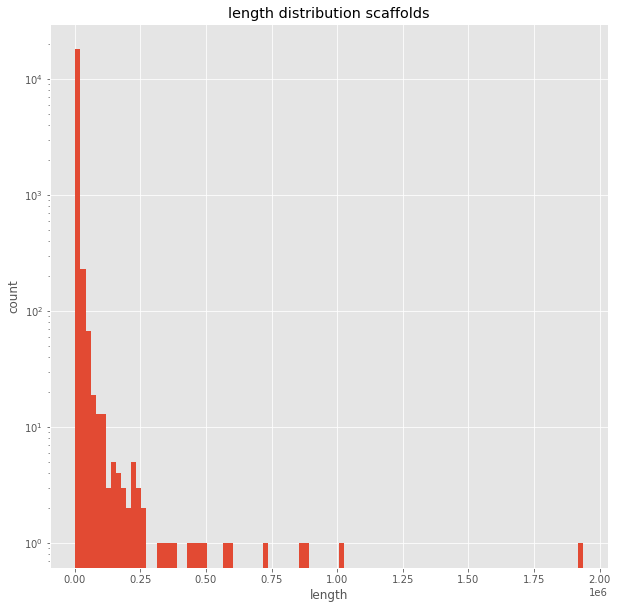

In [1]:
import matplotlib.pyplot as plt
import re
%matplotlib inline  
plt.style.use('ggplot')

f = open("data/assembly/scaffolds.fasta", "r")

lines = f.readlines()
f.close()

lengths = []
regexp = re.compile(">")

for line in lines:
    if re.search(regexp, line):
        line = line.strip().split('_')
        lengths.append(float(line[3]))
        
fig = plt.figure(figsize=(10,10))
plt.hist(lengths, bins=100, log=True);
plt.title("length distribution scaffolds");
plt.xlabel("length");
plt.ylabel("count");

Did you expect this distribution?

Why would there be so many short scaffolds?

Now make the following plot, what do the axis mean, and what do you think you see in the figure?

<function matplotlib.pyplot.show(close=None, block=None)>

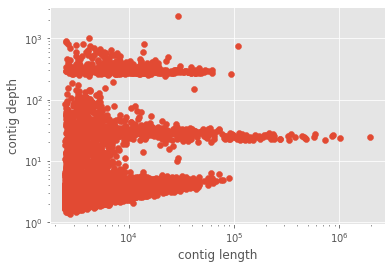

In [2]:
coverage = []
for line in lines:
    if re.search(regexp, line):
        line = line.strip().split('_')
        coverage.append(float(line[5]))

plt.scatter(lengths,coverage)
plt.xlabel('contig length')
plt.ylabel('contig depth')
plt.xscale('log')
plt.yscale('log')
plt.show

### example

For my PhD project on the Azolla metagenome, I made a "metagenome taxnomy browser" based on the simple principle you just used.
In addition to plotting contig depth vs contig length, I added taxonomy information and some filtering options. 
The final interactive graph is available [online to play with](https://utrecht-university.shinyapps.io/Azolla_genus-wide_metagenome_taxonomy/).